# Test Yolo Inference

In [1]:
import services.ai_services.my_models as Models
import services.image_handler.utils as IMUtils
import services.ai_services.inferences as INF

In [ ]:
yolo = Models.YOLOv8(Models.YoloType.Custom.Plate_best)

In [ ]:
image = IMUtils.read_image('C:/Users/Alireza/Desktop/plate/2171038_FRONT.jpg')
image_rgb = IMUtils.convert_to_rgb(image)
image2 = IMUtils.read_image('C:/Users/Alireza/Desktop/plate/2170593_FRONT.jpg')
image_rgb2 = IMUtils.convert_to_rgb(image2)
IMUtils.show_image(image_rgb)
IMUtils.show_image(image_rgb2)
images = [image, image2]

In [6]:
inference = INF.YOLOInference(yolo)

In [ ]:
cropped_out = inference.run_full_pipeline(images)
for i in cropped_out:
    IMUtils.show_image(i, turn_grey=True, cmap='grey')

# Get and Save Plates

In [1]:
import services.image_handler.utils as IMUtils
import services.ai_services.inferences as INF
import services.ai_services.my_models as Models

In [2]:
images = IMUtils.read_images_from_file("C:/Users/Alireza/Desktop/cars/")

Reading images: 100%|██████████| 139/139 [00:02<00:00, 64.51file/s]


In [4]:
model = Models.YOLOv8(Models.YoloType.Custom.Plate_best)
inference = INF.YOLOInference(model)

Loading YOLO model from weights/best(plate).pt ...

Layer (type:depth-idx)                                       Param #
YOLO                                                         --
├─DetectionModel: 1-1                                        --
│    └─Sequential: 2-1                                       --
│    │    └─Conv: 3-1                                        (1,392)
│    │    └─Conv: 3-2                                        (41,664)
│    │    └─C2f: 3-3                                         (111,360)
│    │    └─Conv: 3-4                                        (166,272)
│    │    └─C2f: 3-5                                         (813,312)
│    │    └─Conv: 3-6                                        (664,320)
│    │    └─C2f: 3-7                                         (3,248,640)
│    │    └─Conv: 3-8                                        (1,991,808)
│    │    └─C2f: 3-9                                         (3,985,920)
│    │    └─SPPF: 3-10                       

In [5]:
cropped_out = inference.run_full_pipeline(images)

Running full pipeline... 

conf=0.5, show=False, save=False
Running inference on Image

0: 640x640 1 plate, 19.2ms
1: 640x640 1 plate, 19.2ms
2: 640x640 1 plate, 19.2ms
3: 640x640 1 plate, 19.2ms
4: 640x640 2 plates, 19.2ms
5: 640x640 8 plates, 19.2ms
6: 640x640 6 plates, 19.2ms
7: 640x640 1 plate, 19.2ms
8: 640x640 1 plate, 19.2ms
9: 640x640 1 plate, 19.2ms
10: 640x640 2 plates, 19.2ms
11: 640x640 1 plate, 19.2ms
12: 640x640 1 plate, 19.2ms
13: 640x640 1 plate, 19.2ms
14: 640x640 1 plate, 19.2ms
15: 640x640 1 plate, 19.2ms
Speed: 17.1ms preprocess, 19.2ms inference, 6.7ms postprocess per image at shape (1, 3, 640, 640)
Yolo results are generated for batch 0 

Found Bounding Boxes
Images were cropped 

conf=0.5, show=False, save=False
Running inference on Image

0: 640x640 1 plate, 17.3ms
1: 640x640 1 plate, 17.3ms
2: 640x640 1 plate, 17.3ms
3: 640x640 1 plate, 17.3ms
4: 640x640 1 plate, 17.3ms
5: 640x640 2 plates, 17.3ms
6: 640x640 1 plate, 17.3ms
7: 640x640 1 plate, 17.3ms
8: 640x640

In [6]:
output_dir = "C:/Users/Alireza/Desktop/plates/"
IMUtils.save_cropped_images(cropped_out, output_dir)

Saving images: 100%|██████████| 190/190 [00:00<00:00, 689.37file/s]

Files were saved successfully in C:/Users/Alireza/Desktop/plates/ 



# test

In [1]:
import os

In [2]:
image_dir = "C:/Users/Alireza/Desktop/plate_data/data/images"
label_dir = "C:/Users/Alireza/Desktop/plate_data/data/labels"

In [3]:
images = os.listdir(image_dir)
labels = os.listdir(label_dir)

In [6]:
from sklearn.model_selection import train_test_split

In [20]:
image_train, image_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)

In [19]:
os.makedirs("C:/Users/Alireza/Desktop/plate_data/train", exist_ok=True)
os.makedirs("C:/Users/Alireza/Desktop/plate_data/valid", exist_ok=True)
os.makedirs("C:/Users/Alireza/Desktop/plate_data/train/images", exist_ok=True)
os.makedirs("C:/Users/Alireza/Desktop/plate_data/valid/images", exist_ok=True)
os.makedirs("C:/Users/Alireza/Desktop/plate_data/train/labels", exist_ok=True)
os.makedirs("C:/Users/Alireza/Desktop/plate_data/valid/labels", exist_ok=True)

In [13]:
import shutil

In [21]:
for img in image_train:
    source_path = os.path.join(image_dir, img)
    destination_path = f"C:/Users/Alireza/Desktop/plate_data/train/images/{img}"
    shutil.copy2(source_path, destination_path)

for label in labels_train:
    source_path = os.path.join(label_dir, label)
    destination_path = f"C:/Users/Alireza/Desktop/plate_data/train/labels/{label}"
    shutil.copy2(source_path, destination_path)

In [22]:
for img in image_test:
    source_path = os.path.join(image_dir, img)
    destination_path = f"C:/Users/Alireza/Desktop/plate_data/valid/images/{img}"
    shutil.copy2(source_path, destination_path)

# Move labels to the labels directory
for label in labels_test:
    source_path = os.path.join(label_dir, label)
    destination_path = f"C:/Users/Alireza/Desktop/plate_data/valid/labels/{label}"
    shutil.copy2(source_path, destination_path)

In [ ]:
dst_points = np.array([[0, 0], [image_width, 0], [image_width, image_height], [0, image_height]], dtype=np.float32)
src_points  = np.array(list(shape_corners.values()), dtype=np.float32)

M = cv2.getPerspectiveTransform(src_points, dst_points)
rectified_image = cv2.warpPerspective(gray_image_1, M, (image_width, image_height))

plt.imshow(rectified_image, cmap='gray')
plt.axis('off')
plt.show()

# test 2

In [1]:
from services.ai_services.my_models import Plate_ResNet
import services.ai_services.utils as AIUtils
from torch.utils.data import DataLoader

In [17]:
device = AIUtils.select_device()
res = Plate_ResNet(device=device)

NVIDIA GeForce GTX 1660 Ti have been located and selected
Selected model is ResNetType.Base
ResNet18
Layer (type:depth-idx)                        Param #
CustomResNet                                  --
├─ResNet: 1-1                                 --
│    └─Conv2d: 2-1                            9,408
│    └─BatchNorm2d: 2-2                       128
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   73,984
│    │    └─BasicBlock: 3-2                   73,984
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   230,144
│    │    └─BasicBlock: 3-4                   295,424
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   919,040
│    │    └─BasicBlock: 3-6                   1,180,672
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7

In [18]:
res.freeze_unfreeze(True)
res.write_summary()

Start freezing feature extractor ...
Feature extractor freezed
Model is in cuda
Layer (type:depth-idx)                        Param #
CustomResNet                                  --
├─ResNet: 1-1                                 --
│    └─Conv2d: 2-1                            (9,408)
│    └─BatchNorm2d: 2-2                       (128)
│    └─ReLU: 2-3                              --
│    └─MaxPool2d: 2-4                         --
│    └─Sequential: 2-5                        --
│    │    └─BasicBlock: 3-1                   (73,984)
│    │    └─BasicBlock: 3-2                   (73,984)
│    └─Sequential: 2-6                        --
│    │    └─BasicBlock: 3-3                   (230,144)
│    │    └─BasicBlock: 3-4                   (295,424)
│    └─Sequential: 2-7                        --
│    │    └─BasicBlock: 3-5                   (919,040)
│    │    └─BasicBlock: 3-6                   (1,180,672)
│    └─Sequential: 2-8                        --
│    │    └─BasicBlock: 3-7     

In [19]:
train_dataset = AIUtils.CustomResNetDataset("C:/Users/Alireza/Desktop/plate_data/train/images",
                                            "C:/Users/Alireza/Desktop/plate_data/train/labels")
train_loader = DataLoader(train_dataset, 16, shuffle=True)

valid_dataset = AIUtils.CustomResNetDataset("C:/Users/Alireza/Desktop/plate_data/valid/images",
                                            "C:/Users/Alireza/Desktop/plate_data/valid/labels")
valid_loader = DataLoader(valid_dataset, 16, shuffle=True)

In [20]:
import torch.nn as nn
import torch.optim as optim

In [22]:
lr=0.001
weight_decay=0.001
optimizer = optim.Adam(res.model.parameters(), lr=lr, weight_decay=weight_decay)
criterion = nn.MSELoss()

res.train(train_loader,
          valid_loader,
          optimizer,
          weight_decay=weight_decay,
          lr=lr,
          epochs=150,
          loss_fn=criterion)

Starting training process for model ResNetType.Base ...
Hyper Parameters:
- Epochs Number = 150
- Learning Rate = 0.001
- Weight Decay = 0.001
- Loss Function = MSELoss()
- Optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.001
) 



Epoch  0: Train loss=0.175, Val loss=0.027


Epoch  1: Train loss=0.151, Val loss=0.007


Epoch  2: Train loss=0.097, Val loss=0.009


Epoch  3: Train loss=0.104, Val loss=0.016


Epoch  4: Train loss=0.215, Val loss=0.021


Epoch  5: Train loss=0.087, Val loss=0.008


Epoch  6: Train loss=0.189, Val loss=0.011


Epoch  7: Train loss=0.281, Val loss=0.005


Epoch  8: Train loss=0.155, Val loss=0.015


Epoch  9: Train loss=0.056, Val loss=0.005


Epoch 10: Train loss=0.140, Val loss=0.011


Epoch 11: Train loss=0.076, Val loss=0.015


Epoch 12: Train loss=0.126, Val loss=0.022


Epoch 13: Train loss=0.106, Val loss=0.008


Epoch 14: Train loss=0.162, Val loss=0.012


Epoch 15: Train loss=0.128, Val loss=0.006


Epoch 16: Train loss=0.183, Val loss=0.030


Epoch 17: Train loss=0.162, Val loss=0.002


Epoch 18: Train loss=0.098, Val loss=0.010


Epoch 19: Train loss=0.178, Val loss=0.010


Epoch 20: Train loss=0.362, Val loss=0.017


Epoch 21: Train loss=0.128, Val loss=0.015


Epoch 22: Train loss=0.144, Val loss=0.010


Epoch 23: Train loss=0.136, Val loss=0.002


Epoch 24: Train loss=0.246, Val loss=0.012


Epoch 25: Train loss=0.064, Val loss=0.003


Epoch 26: Train loss=0.328, Val loss=0.066


Epoch 27: Train loss=0.129, Val loss=0.003


Epoch 28: Train loss=0.082, Val loss=0.006


Epoch 29: Train loss=0.096, Val loss=0.004


Epoch 30: Train loss=0.606, Val loss=0.032


Epoch 31: Train loss=0.304, Val loss=0.008


Epoch 32: Train loss=0.316, Val loss=0.012


Epoch 33: Train loss=0.151, Val loss=0.009


Epoch 34: Train loss=0.177, Val loss=0.024


Epoch 35: Train loss=0.133, Val loss=0.004


Epoch 36: Train loss=0.046, Val loss=0.019


Epoch 37: Train loss=0.104, Val loss=0.003


Epoch 38: Train loss=0.066, Val loss=0.009


Epoch 39: Train loss=0.080, Val loss=0.004


Epoch 40: Train loss=0.469, Val loss=0.164


Epoch 41: Train loss=0.429, Val loss=0.005


Epoch 42: Train loss=0.132, Val loss=0.004


Epoch 43: Train loss=0.326, Val loss=0.018


Epoch 44: Train loss=0.163, Val loss=0.002


Epoch 45: Train loss=0.131, Val loss=0.009


Epoch 46: Train loss=0.129, Val loss=0.010


Epoch 47: Train loss=0.529, Val loss=0.049


Epoch 48: Train loss=0.454, Val loss=0.014


Epoch 49: Train loss=0.182, Val loss=0.023


Epoch 50: Train loss=0.193, Val loss=0.027


Epoch 51: Train loss=0.178, Val loss=0.023


Epoch 52: Train loss=0.103, Val loss=0.004


Epoch 53: Train loss=0.132, Val loss=0.011


Epoch 54: Train loss=0.088, Val loss=0.002


Epoch 55: Train loss=0.050, Val loss=0.005


Epoch 56: Train loss=0.184, Val loss=0.003


Epoch 57: Train loss=0.145, Val loss=0.005


Epoch 58: Train loss=0.104, Val loss=0.005


Epoch 59: Train loss=0.178, Val loss=0.007


Epoch 60: Train loss=0.338, Val loss=0.005


Epoch 61: Train loss=0.093, Val loss=0.003


Epoch 62: Train loss=0.179, Val loss=0.021


Epoch 63: Train loss=0.094, Val loss=0.004


Epoch 64: Train loss=0.043, Val loss=0.003


Epoch 65: Train loss=0.244, Val loss=0.001


Epoch 66: Train loss=0.055, Val loss=0.003


Epoch 67: Train loss=0.215, Val loss=0.015


Epoch 68: Train loss=0.103, Val loss=0.005


Epoch 69: Train loss=0.097, Val loss=0.008


Epoch 70: Train loss=0.294, Val loss=0.020


Epoch 71: Train loss=0.215, Val loss=0.007


Epoch 72: Train loss=0.140, Val loss=0.007


Epoch 73: Train loss=0.204, Val loss=0.014


Epoch 74: Train loss=0.054, Val loss=0.014


Epoch 75: Train loss=0.248, Val loss=0.003


Epoch 76: Train loss=0.174, Val loss=0.006


Epoch 77: Train loss=0.096, Val loss=0.005


Epoch 78: Train loss=0.223, Val loss=0.020


Epoch 79: Train loss=0.644, Val loss=0.023


Epoch 80: Train loss=0.160, Val loss=0.004


Epoch 81: Train loss=0.131, Val loss=0.011


Epoch 82: Train loss=0.131, Val loss=0.005


Epoch 83: Train loss=0.327, Val loss=0.017


Epoch 84: Train loss=0.088, Val loss=0.015


Epoch 85: Train loss=0.072, Val loss=0.008


Epoch 86: Train loss=0.124, Val loss=0.005


Epoch 87: Train loss=0.147, Val loss=0.009


Epoch 88: Train loss=0.092, Val loss=0.005


Epoch 89: Train loss=0.062, Val loss=0.004


Epoch 90: Train loss=0.042, Val loss=0.005


Epoch 91: Train loss=0.066, Val loss=0.007


Epoch 92: Train loss=0.204, Val loss=0.027


Epoch 93: Train loss=0.081, Val loss=0.003


Epoch 94: Train loss=0.078, Val loss=0.006


Epoch 95: Train loss=0.083, Val loss=0.007


Epoch 96: Train loss=0.249, Val loss=0.004


Epoch 97: Train loss=0.247, Val loss=0.004


Epoch 98: Train loss=0.107, Val loss=0.002


Epoch 99: Train loss=0.053, Val loss=0.002


Epoch 100: Train loss=0.093, Val loss=0.007


Epoch 101: Train loss=0.091, Val loss=0.018


Epoch 102: Train loss=0.081, Val loss=0.002


Epoch 103: Train loss=0.156, Val loss=0.002


Epoch 104: Train loss=0.069, Val loss=0.005


Epoch 105: Train loss=0.049, Val loss=0.003


Epoch 106: Train loss=0.075, Val loss=0.004


Epoch 107: Train loss=0.108, Val loss=0.001


Epoch 108: Train loss=0.107, Val loss=0.007


Epoch 109: Train loss=0.054, Val loss=0.002


Epoch 110: Train loss=0.046, Val loss=0.015


Epoch 111: Train loss=0.117, Val loss=0.010


Epoch 112: Train loss=0.090, Val loss=0.014


Epoch 113: Train loss=0.192, Val loss=0.010


Epoch 114: Train loss=0.134, Val loss=0.003


Epoch 115: Train loss=0.030, Val loss=0.003


Epoch 116: Train loss=0.059, Val loss=0.003


Epoch 117: Train loss=0.073, Val loss=0.003


Epoch 118: Train loss=0.197, Val loss=0.025


Epoch 119: Train loss=0.208, Val loss=0.003


Epoch 120: Train loss=0.095, Val loss=0.002


Epoch 121: Train loss=0.401, Val loss=0.017


Epoch 122: Train loss=0.187, Val loss=0.003


Epoch 123: Train loss=0.257, Val loss=0.003


Epoch 124: Train loss=0.051, Val loss=0.003


Epoch 125: Train loss=0.448, Val loss=0.183


Epoch 126: Train loss=0.577, Val loss=0.018


Epoch 127: Train loss=0.299, Val loss=0.011


Epoch 128: Train loss=0.075, Val loss=0.010


Epoch 129: Train loss=0.079, Val loss=0.002


Epoch 130: Train loss=0.183, Val loss=0.006


Epoch 131: Train loss=0.176, Val loss=0.036


Epoch 132: Train loss=0.229, Val loss=0.005


Epoch 133: Train loss=0.148, Val loss=0.005


Epoch 134: Train loss=0.065, Val loss=0.011


Epoch 135: Train loss=0.205, Val loss=0.006


Epoch 136: Train loss=0.114, Val loss=0.017


Epoch 137: Train loss=0.047, Val loss=0.004


Epoch 138: Train loss=0.156, Val loss=0.012


Epoch 139: Train loss=0.173, Val loss=0.013


Epoch 140: Train loss=0.081, Val loss=0.005


Epoch 141: Train loss=0.071, Val loss=0.005


Epoch 142: Train loss=0.028, Val loss=0.002


Epoch 143: Train loss=0.105, Val loss=0.014


Epoch 144: Train loss=0.306, Val loss=0.020


Epoch 145: Train loss=0.123, Val loss=0.024


Epoch 146: Train loss=0.286, Val loss=0.006


Epoch 147: Train loss=0.299, Val loss=0.003


Epoch 148: Train loss=0.076, Val loss=0.017


Epoch 149: Train loss=0.122, Val loss=0.013

Training completed
Training time: 3 minutes and 5.07 seconds


In [12]:
his = res.model_training_history

In [13]:
import matplotlib.pyplot as plt

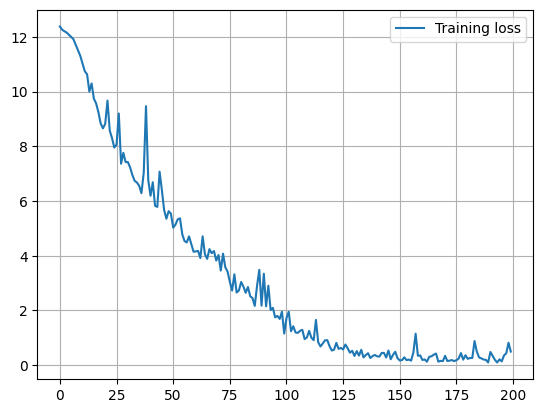

In [23]:
plt.plot(his['train_loss'], label='Training loss')
plt.legend()
plt.grid()
plt.show()

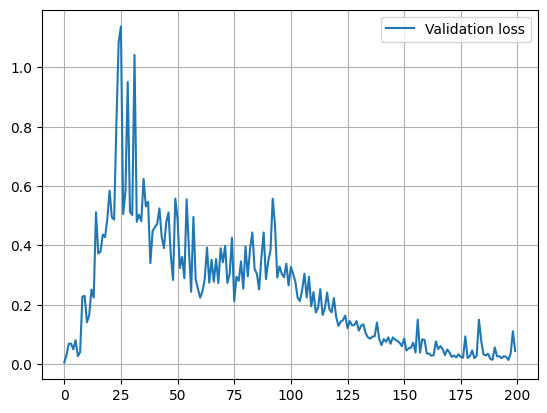

In [24]:
plt.plot(his['valid_loss'], label='Validation loss')
plt.legend()
plt.grid()
plt.show()

In [39]:
len(res.model_training_history["train_loss"])

200

In [40]:
res.model_training_history

{'train_loss': [12.31122079672524,
  12.169518613967652,
  12.05380609774361,
  13.832932932308307,
  11.55532476163139,
  11.241971439446885,
  12.218682919828275,
  10.275817286092252,
  9.620721689047524,
  8.933603890025958,
  9.422074680511182,
  7.60616217177516,
  6.845905925519169,
  6.656125979682508,
  7.122376853284744,
  6.225286806734225,
  6.333688364242213,
  5.641639392596845,
  5.52550294528754,
  5.650128154328075,
  7.01966073033147,
  6.136127118485423,
  5.158278005191693,
  6.498728596745208,
  4.861187334639577,
  4.58958985935004,
  4.43892584365016,
  4.555482322034744,
  4.525016224041534,
  4.446776953749001,
  3.7867174239966053,
  4.171593029278155,
  3.71934085151258,
  3.5732831376048324,
  3.3029297655002,
  2.814945111259485,
  2.638572814746406,
  2.5817527892871404,
  2.6066327079797325,
  2.3849838305586064,
  1.7053170006115215,
  1.7966747344873202,
  1.9818355084989017,
  2.5530294107552916,
  1.4864815903928714,
  1.262436741838059,
  1.749066727